# ASSIGNMENT - 1

### Problem Statement

Linear regression by using Deep Neural network: Implement Boston housing price prediction problem by Linear regression using Deep Neural network. Use Boston House price prediction dataset.

<a id = 'data'></a>
# About the Dataset

The dataset used in this project comes from the UCI Machine Learning Repository. This data was collected in 1978 and each of the 506 entries represents aggregate information about 14 features of homes from various suburbs located in Boston.

The features can be summarized as follows:
* CRIM: This is the per capita crime rate by town
* ZN: This is the proportion of residential land zoned for lots larger than 25,000 sq.ft.
* INDUS: This is the proportion of non-retail business acres per town.
* CHAS: This is the Charles River dummy variable (this is equal to 1 if tract bounds river; 0 otherwise)
* NOX: This is the nitric oxides concentration (parts per 10 million)
* RM: This is the average number of rooms per dwelling
* AGE: This is the proportion of owner-occupied units built prior to 1940
* DIS: This is the weighted distances to five Boston employment centers
* RAD: This is the index of accessibility to radial highways
* TAX: This is the full-value property-tax rate per 1000 bucks
* PTRATIO: This is the pupil-teacher ratio by town
* B: This is calculated as 1000(Bk — 0.63)², where Bk is the proportion of people of African American descent by town
* LSTAT: This is the percentage lower status of the population
* PRICE: This is the median value of owner-occupied homes in 1000s

<a id = 'library'></a>
# Importing libraries and the dataset
Unlike the conventional way, I import the library when it is needed. It will actually help you to understand where the application of the class and it's function is used

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

#Lets load the dataset and sample some
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'PRICE']
df = pd.read_csv('housing.csv', header=None, delimiter=r"\s+", names=column_names)


In [2]:
df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [3]:
# Dimension of the dataset
print(np.shape(df))

(506, 14)


In [4]:
# Let's summarize the data to see the distribution of data
print(df.describe())

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

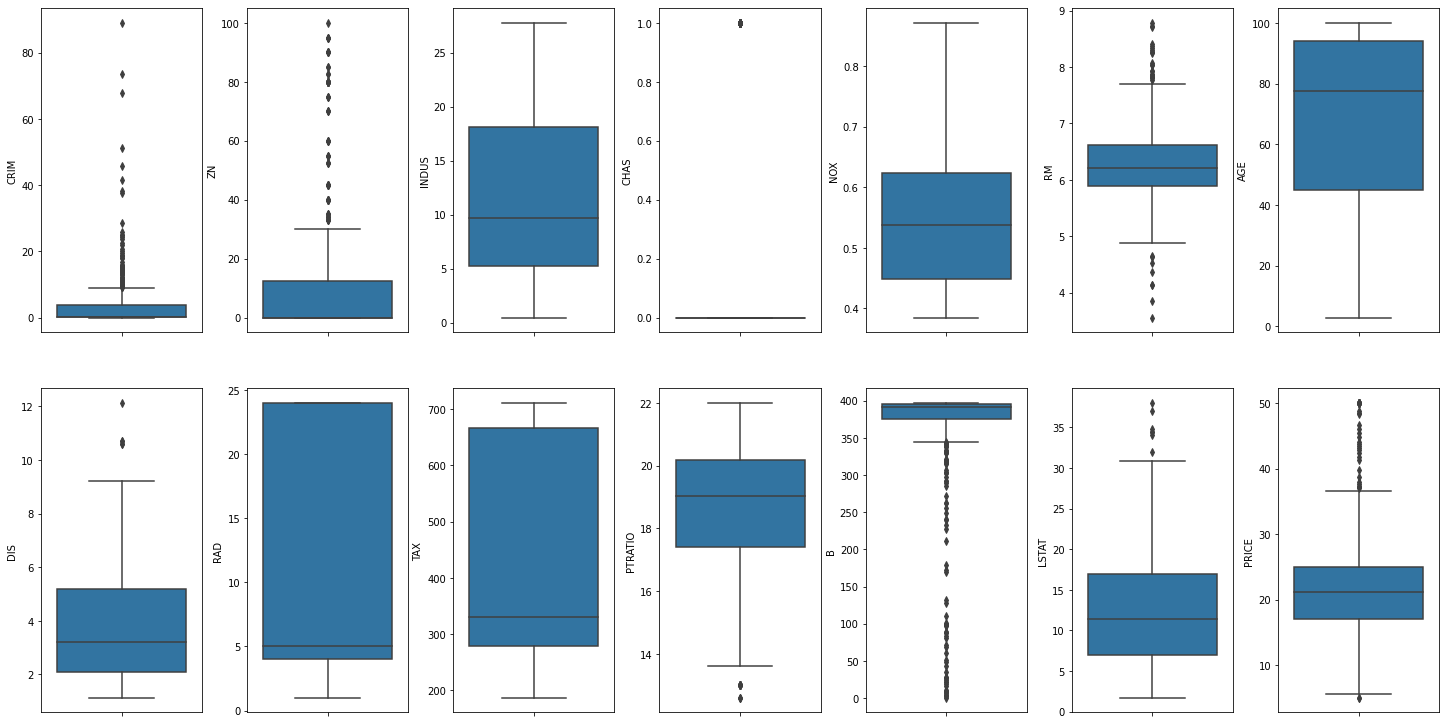

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in df.items():
    sns.boxplot(y=k, data=df, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [6]:
    for k, v in df.items():
        q1 = v.quantile(0.25)
        q3 = v.quantile(0.75)
        irq = q3 - q1
        v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
        perc = np.shape(v_col)[0] * 100.0 / np.shape(df)[0]
        print("Column %s outliers = %.2f%%" % (k, perc))

Column CRIM outliers = 13.04%
Column ZN outliers = 13.44%
Column INDUS outliers = 0.00%
Column CHAS outliers = 100.00%
Column NOX outliers = 0.00%
Column RM outliers = 5.93%


Column AGE outliers = 0.00%
Column DIS outliers = 0.99%
Column RAD outliers = 0.00%
Column TAX outliers = 0.00%
Column PTRATIO outliers = 2.96%
Column B outliers = 15.22%
Column LSTAT outliers = 1.38%
Column PRICE outliers = 7.91%


In [7]:
df = df[~(df['PRICE'] >= 35.0)]
print(np.shape(df))

(458, 14)


In [8]:
#Looking at the data with names and target variable
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7


In [9]:
#Shape of the data
print(df.shape)

(458, 14)


In [10]:
#Checking the null values in the dataset
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

No null values in the dataset, no missing value treatement needed

In [11]:
#Checking the statistics of the data
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,458.000000,458.000000,458.000000,458.000000,458.000000,458.000000,458.000000,458.000000,458.000000,458.000000,458.000000,458.000000,458.000000,458.000000
mean,3.880713,10.180131,11.588166,0.058952,0.558875,6.156945,69.170524,3.807797,9.842795,417.893013,18.676201,353.521965,13.490699,20.320087
std,8.973996,21.950057,6.756057,0.235792,0.117724,0.563489,28.008853,2.125004,8.884462,168.736868,2.027875,95.363794,6.967358,6.185151
min,0.006320,0.000000,0.740000,0.000000,0.385000,3.561000,2.900000,1.137000,1.000000,187.000000,12.600000,0.320000,1.980000,5.000000
25%,0.084020,0.000000,5.860000,0.000000,0.453000,5.871250,45.725000,2.100175,4.000000,287.000000,17.600000,373.105000,7.927500,16.200000
50%,0.256510,0.000000,9.900000,0.000000,0.538000,6.152000,78.400000,3.199200,5.000000,345.000000,19.200000,391.880000,12.370000,20.400000
75%,4.082653,0.000000,18.100000,0.000000,0.624000,6.481750,94.300000,5.214600,24.000000,666.000000,20.200000,396.397500,17.302500,23.800000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,34.900000


This is sometimes very useful, for example if you look at the CRIM the max is 88.97 and 75% of the value is below 3.677083 and mean is 3.613524 so it means the max values is actually an outlier or there are outliers present in the column

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 458 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     458 non-null    float64
 1   ZN       458 non-null    float64
 2   INDUS    458 non-null    float64
 3   CHAS     458 non-null    int64  
 4   NOX      458 non-null    float64
 5   RM       458 non-null    float64
 6   AGE      458 non-null    float64
 7   DIS      458 non-null    float64
 8   RAD      458 non-null    int64  
 9   TAX      458 non-null    float64
 10  PTRATIO  458 non-null    float64
 11  B        458 non-null    float64
 12  LSTAT    458 non-null    float64
 13  PRICE    458 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 53.7 KB


<a id = 'visual'></a>
# Visualisation

<AxesSubplot: xlabel='PRICE', ylabel='Count'>

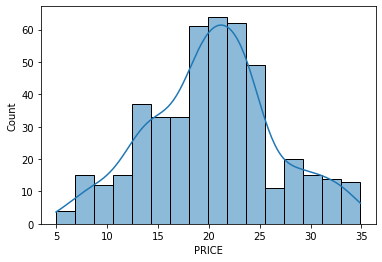

In [13]:
#checking the distribution of the target variable
import seaborn as sns
sns.histplot(df.PRICE , kde = True)

The distribution seems normal, has not be the data normal we would have perform log transformation or took to square root of the data to make the data normal. Normal distribution is need for the machine learning for better predictiblity of the model

<AxesSubplot: >

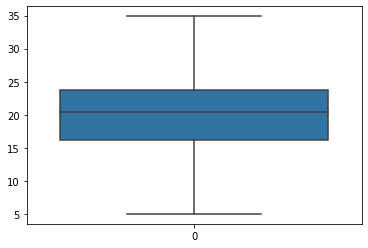

In [14]:
#Distribution using box plot
sns.boxplot(df.PRICE)

<a id = 'corr'></a>
### Checking the correlation of the independent feature with the dependent feature

Correlation is a statistical technique that can show whether and how strongly pairs of variables are related.An intelligent correlation analysis can lead to a greater understanding of your data

In [15]:
#checking Correlation of the data 
correlation = df.corr()
correlation.loc['PRICE']

CRIM      -0.509111
ZN         0.432791
INDUS     -0.598380
CHAS       0.098362
NOX       -0.584249
RM         0.540151
AGE       -0.571890
DIS        0.461164
RAD       -0.515860
TAX       -0.587285
PTRATIO   -0.471471
B          0.404020
LSTAT     -0.780531
PRICE      1.000000
Name: PRICE, dtype: float64

<AxesSubplot: >

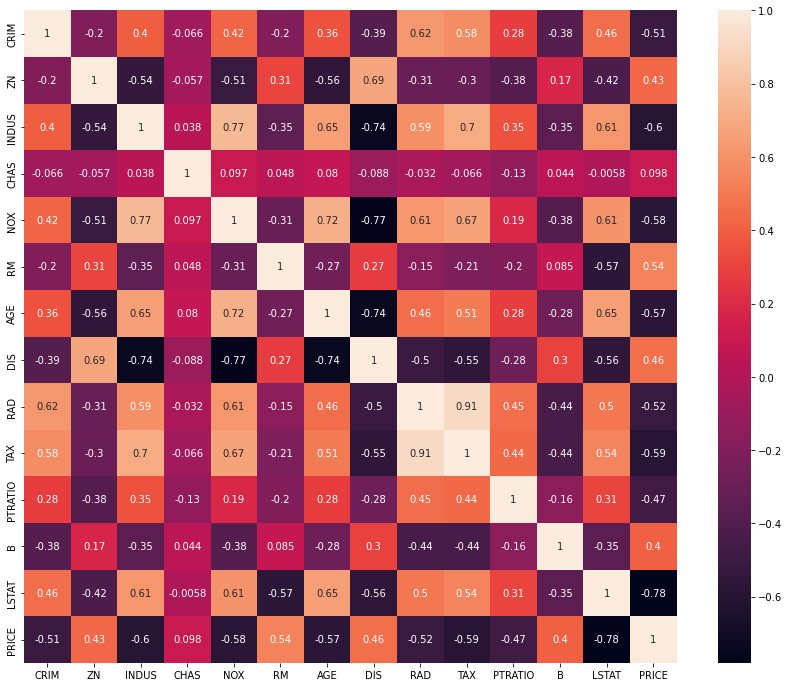

In [16]:
# plotting the heatmap
import matplotlib.pyplot as plt
fig,axes = plt.subplots(figsize=(15,12))
sns.heatmap(correlation,square = True,annot = True)

By looking at the correlation plot LSAT is negatively correlated with -0.75 and RM is positively correlated to the price and PTRATIO is correlated negatively with -0.51

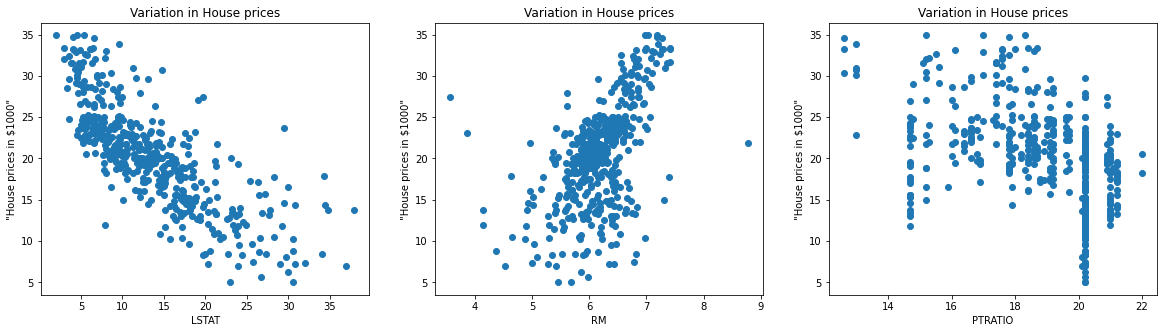

In [17]:
# Checking the scatter plot with the most correlated features
plt.figure(figsize = (20,5))
features = ['LSTAT','RM','PTRATIO']
for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = df[col]
    y = df.PRICE
    plt.scatter(x, y, marker='o')
    plt.title("Variation in House prices")
    plt.xlabel(col)
    plt.ylabel('"House prices in $1000"')

<a id = 'split'></a>
### Splitting the dependent feature and independent feature 

In [18]:
#X = data[['LSTAT','RM','PTRATIO']]
X = df.iloc[:,:-1]
y= df.PRICE

<a id = 'valid'></a>
### Splitting the data for Model Validation 

In [19]:
# Splitting the data into train and test for building the model
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 4)

<a id = 'build'></a>
### Building the Model 

In [20]:
#Linear Regression 
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

In [21]:
#Fitting the model
regressor.fit(X_train,y_train)

LinearRegression()

<a id = 'evaluate'></a>
### Model Evaluation

In [22]:
#Prediction on the test dataset
y_pred = regressor.predict(X_test)

In [23]:
# Predicting RMSE the Test set results
from sklearn.metrics import mean_squared_error
rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))
print(rmse)

3.061315764852644


In [24]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(r2)

0.7443761652148535


<a id  = 'NN'></a>
## Neural Networks

In [25]:
#Scaling the dataset
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

* We are using Keras for developing the neural network.
* Models in Keras are defined as a sequence of layers
* We create a Sequential model and add layers one at a time with activation function
* Activation function decides, whether a neuron should be activated or not by calculating weighted sum and further adding bias with it. The purpose of the activation function is to introduce non-linearity into the output of a neuron.The activation we are using is relu
* As this is a regression problem, the output layer has no activation function
* Elements of neural network has input layer, hidden layer and output layer
* input layer:- This layer accepts input features. It provides information from the outside world to the network, no computation is performed at this layer, nodes here just pass on the information(features) to the hidden layer.
* Hidden layer:-  Nodes of this layer are not exposed to the outer world, they are the part of the abstraction provided by any neural network. Hidden layer performs all sort of computation on the features entered through the input layer and transfer the result to the output layer.
* Output layer:- This layer bring up the information learned by the network to the outer world.
* Model Compilation:- The compilation is the final step in creating a model. Once the compilation is done, we can move on to training phase.
* Optimizer : - The optimizer we are using is adam. Adam is an optimization algorithm that can be used instead of the classical stochastic gradient descent procedure to update network weights iterative based in training data.
* Loss - mean square error

In [26]:
#Creating the neural network model
import keras
from keras.layers import Dense, Activation,Dropout
from keras.models import Sequential

model = Sequential()

model.add(Dense(128,activation  = 'relu',input_dim =13))
model.add(Dense(64,activation  = 'relu'))
model.add(Dense(32,activation  = 'relu'))
model.add(Dense(16,activation  = 'relu'))
model.add(Dense(1))
model.compile(optimizer = 'adam',loss = 'mean_squared_error')

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\requests\__init__.py:102: RequestsDependencyWarning: urllib3 (2.0.7) or chardet (5.2.0)/charset_normalizer (3.3.0) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


In [27]:
model.fit(X_train, y_train, epochs = 100)

Epoch 1/100
12/12 [==============================] - 18s 10ms/step - loss: 412.6211
Epoch 2/100
12/12 [==============================] - 0s 11ms/step - loss: 312.7315
Epoch 3/100
12/12 [==============================] - 0s 12ms/step - loss: 156.4844
Epoch 4/100
12/12 [==============================] - 0s 12ms/step - loss: 54.8570
Epoch 5/100
12/12 [==============================] - 0s 12ms/step - loss: 35.1074
Epoch 6/100
12/12 [==============================] - 0s 8ms/step - loss: 21.3246
Epoch 7/100
12/12 [==============================] - 0s 10ms/step - loss: 15.8459
Epoch 8/100
12/12 [==============================] - 0s 10ms/step - loss: 13.4216
Epoch 9/100
12/12 [==============================] - 0s 10ms/step - loss: 12.1204
Epoch 10/100
12/12 [==============================] - 0s 11ms/step - loss: 10.9636
Epoch 11/100
12/12 [==============================] - 0s 9ms/step - loss: 10.4899
Epoch 12/100
12/12 [==============================] - 0s 12ms/step - loss: 9.9866
Epoch 13/100

<a id = 'eval'></a>
### Evaluation of the model

In [28]:
y_pred = model.predict(X_test)

3/3 [==============================] - 1s 9ms/step


In [29]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(r2)

0.8325509861124551


In [30]:
# Predicting RMSE the Test set results
from sklearn.metrics import mean_squared_error
rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))
print(rmse)

2.477700179449272
